In [23]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import joblib



In [2]:
data = pd.read_excel("/Users/godenaan/Desktop/Final year project/Mental_Health_Dataset.xlsx")


In [3]:
data.head()

,Gender,Age,Course_of_Study,Year of Study,CGPA,Academic Workload,Academic Pressure,Financial Concerns,Social Relationships,Average Sleep,Study Satisfaction,Depression,Anxiety,Isolation,Future Insecurity,Panic Attack,Risk Level
0,Male,20,Data Science,2,3.25,4,5,4,3,5,5,2,1,1,2,1,1
1,Male,20,Computer Science,3,3.25,4,4,1,3,5,5,3,3,3,4,1,1
2,Male,20,Computer Science,3,2.75,5,5,3,4,3,5,2,3,3,1,0,1
3,Male,20,Computer Science,3,2.75,5,4,4,1,5,3,5,5,5,3,0,1
4,Female,20,Computer Science,3,3.25,5,5,2,3,5,3,5,5,4,4,0,1


In [4]:
# Clean Course_of_Study: lowercase + strip spaces
data['Course_of_Study'] = data['Course_of_Study'].str.strip().str.lower()

# Optional: Fix common typos/abbreviations (manual mapping)
data['Course_of_Study'] = data['Course_of_Study'].replace({
    'psychology': 'psychology',
    'pendidikan islam': 'pendidikan islam',
    'engin': 'engineering',
    'koe': 'engineering',
    'taasl': 'taasl'
})

In [5]:
#Encode Gender (Label Encoding: Male=0, Female=1)
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

#One-hot encode Course_of_Study
data = pd.get_dummies(data, columns=['Course_of_Study'], prefix='Course')



In [6]:
#Check processed dataset
print("Processed dataset shape:", data.shape)


Processed dataset shape: (188, 59)


In [8]:
print("Dataset shape:", data.shape)
print("\nMissing values:\n", data.isnull().sum().sort_values(ascending=False).head(10))
print("\nSummary statistics:\n", data.describe())

Dataset shape: (188, 59)

Missing values:
 Gender                           0
Course_kirkhs                    0
Course_engine                    0
Course_engineering               0
Course_enm                       0
Course_fiqh                      0
Course_fiqh fatwa                0
Course_human resources           0
Course_human sciences            0
Course_information technology    0
dtype: int64

Summary statistics:
            Gender         Age  Year of Study        CGPA  Academic Workload  \
count  188.000000  188.000000     188.000000  188.000000         188.000000   
mean     0.473404   20.265957       2.058511    3.266303           3.404255   
std      0.500625    2.147878       1.035096    0.574811           1.298449   
min      0.000000   17.000000       1.000000    0.930000           0.000000   
25%      0.000000   19.000000       1.000000    3.245000           3.000000   
50%      0.000000   20.000000       2.000000    3.250000           4.000000   
75%      1.000000  

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/3935859591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Depression", data=data, palette="viridis")


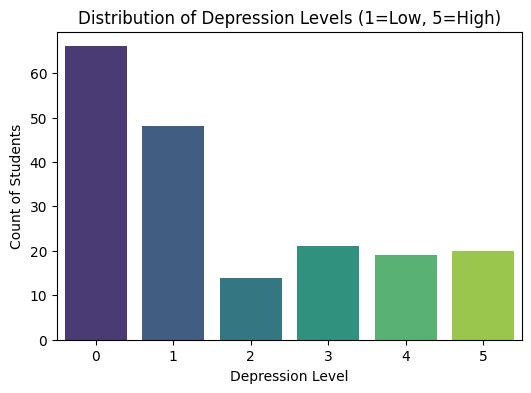

In [9]:
# Distribution of Depression Levels ---
plt.figure(figsize=(6,4))
sns.countplot(x="Depression", data=data, palette="viridis")
plt.title("Distribution of Depression Levels (1=Low, 5=High)")
plt.xlabel("Depression Level")
plt.ylabel("Count of Students")
plt.show()

# Boxplots for numeric features vs Depression ---
numeric_features = ["Age", "CGPA", "Academic Workload", "Academic Pressure",
                    "Financial Concerns", "Social Relationships", "Average Sleep",
                    "Study Satisfaction"]



/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


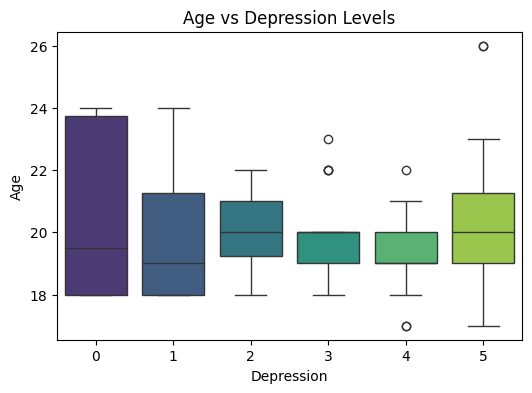

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


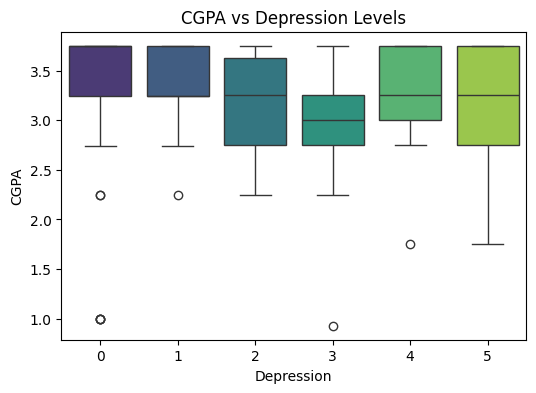

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


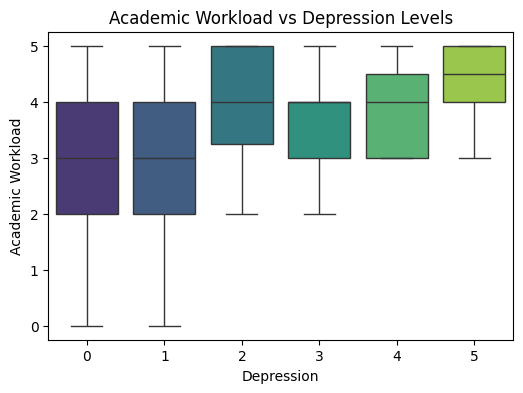

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


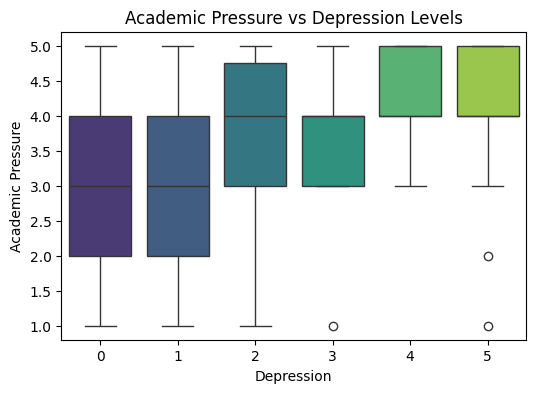

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


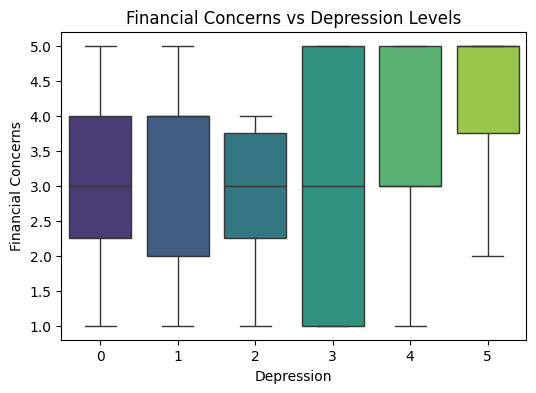

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


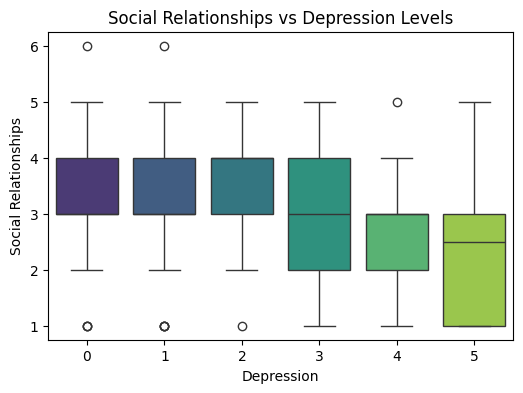

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


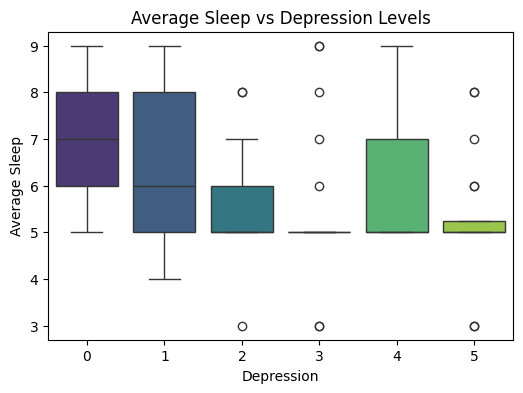

/var/folders/7l/vwkptkys7glg6zwdf7k2kqt80000gn/T/ipykernel_4859/2954825246.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Depression", y=col, data=data, palette="viridis")


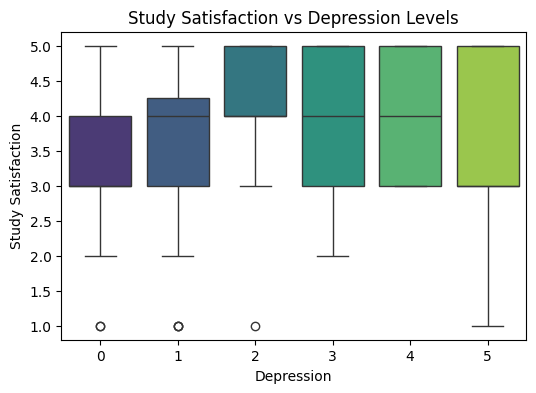

In [10]:
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Depression", y=col, data=data, palette="viridis")
    plt.title(f"{col} vs Depression Levels")
    plt.show()



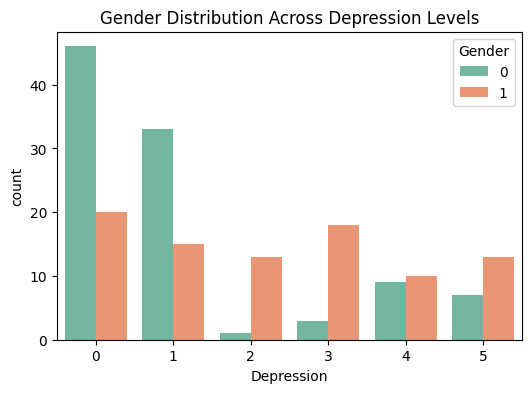

In [12]:
# Gender vs Depression ---
plt.figure(figsize=(6,4))
sns.countplot(x="Depression", hue="Gender", data=data, palette="Set2")
plt.title("Gender Distribution Across Depression Levels")
plt.show()



In [11]:
#  Define target 
y = data["Depression"]

# . Define features explicitly 
feature_cols = [
    'Gender', 'Age', 'Year of Study', 'CGPA', 'Academic Workload', 'Academic Pressure',
    'Financial Concerns', 'Social Relationships', 'Average Sleep', 'Study Satisfaction',
    'Anxiety', 'Isolation', 'Future Insecurity', 'Panic Attack', 'Risk Level',
    'Course_accounting', 'Course_ala', 'Course_banking studies', 'Course_bcs',
    'Course_benl', 'Course_biomedical science', 'Course_biotechnology', 'Course_bit',
    'Course_business administration', 'Course_communication', 'Course_computer science',
    'Course_cts', 'Course_data science', 'Course_diploma nursing', 'Course_diploma tesl',
    'Course_econs', 'Course_engine', 'Course_engineering', 'Course_enm', 'Course_fiqh',
    'Course_fiqh fatwa', 'Course_human resources', 'Course_human sciences',
    'Course_information technology', 'Course_irkhs', 'Course_islamic education',
    'Course_it', 'Course_kenms', 'Course_kirkhs', 'Course_kop', 'Course_law',
    'Course_laws', 'Course_malcom', 'Course_marine science', 'Course_mathemathics',
    'Course_mhsc', 'Course_nursing', 'Course_pendidikan islam', 'Course_psychology',
    'Course_radiography', 'Course_software engineering', 'Course_taasl',
    'Course_usuluddin'
]

X = data[feature_cols]

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# --- 3. Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Features shape: (188, 58)
Target shape: (188,)
Training set: (150, 58) (150,)
Testing set: (38, 58) (38,)


In [12]:
# Build a pipeline: Scale → Logistic Regression
baseline_model = Pipeline([
    ("scaler", StandardScaler()), 
    ("logreg", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        random_state=42
    ))
])

# Train
baseline_model.fit(X_train, y_train)

# Predict
y_pred = baseline_model.predict(X_test)


In [13]:
# Evaluation
print("Baseline Logistic Regression Performance (with Scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Baseline Logistic Regression Performance (with Scaling)
Accuracy: 0.6578947368421053

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.64      0.70      0.67        10
           2       1.00      0.67      0.80         3
           3       0.50      0.50      0.50         4
           4       0.33      0.50      0.40         4
           5       1.00      0.50      0.67         4

    accuracy                           0.66        38
   macro avg       0.71      0.61      0.63        38
weighted avg       0.70      0.66      0.67        38



In [14]:
# --- Regroup Depression levels ---
def regroup_depression(x):
    if x in [0, 1]:
        return "Low"
    elif x in [2, 3]:
        return "Moderate"
    else:  # 4, 5
        return "High"

# Apply regrouping
data["Depression_Grouped"] = data["Depression"].apply(regroup_depression)

# Features (same as before)
X = data.drop(columns=["Depression", "Depression_Grouped"])
y = data["Depression_Grouped"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)
print("Class distribution:\n", y.value_counts())


Training set: (150, 58) (150,)
Testing set: (38, 58) (38,)
Class distribution:
 Depression_Grouped
Low         114
High         39
Moderate     35
Name: count, dtype: int64


In [15]:
# --- Use the regrouped Depression target ---
y = data["Depression_Grouped"]

# Split again (important!)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest on regrouped labels
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    class_weight="balanced"
)

Random Forest Performance
Accuracy: 0.8157894736842105

Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.88      0.74         8
         Low       1.00      0.91      0.95        23
    Moderate       0.50      0.43      0.46         7

    accuracy                           0.82        38
   macro avg       0.71      0.74      0.72        38
weighted avg       0.83      0.82      0.82        38



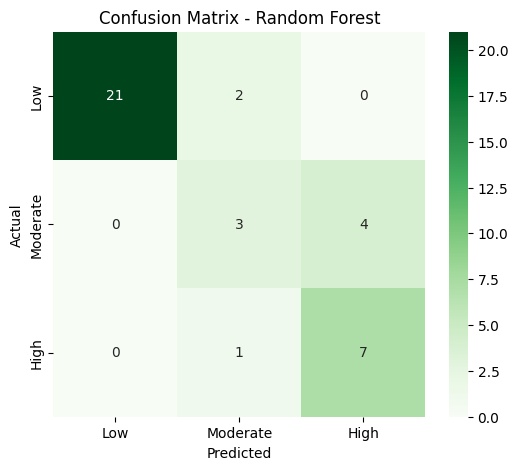

In [16]:
rf_model.fit(X_train, y_train)

# --- Predictions ---
y_pred = rf_model.predict(X_test)

# --- Evaluation ---
print("Random Forest Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred, labels=["Low", "Moderate", "High"])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Low", "Moderate", "High"],
            yticklabels=["Low", "Moderate", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [22]:
# Create an empty DataFrame with same columns
new_student = pd.DataFrame(columns=X.columns)

# Fill with zeros (or some neutral default)
new_student.loc[0] = 0  

# --- Create a new student input with correct dtypes ---
new_student = pd.DataFrame([0]*len(X.columns), index=X.columns).T
new_student = new_student.astype(X.dtypes.to_dict())  # match training dtypes

# --- Set actual values ---
new_student.loc[0, "Gender"] = 1                 # e.g., 1 = Male, 0 = Female
new_student.loc[0, "Age"] = 21
new_student.loc[0, "Year of Study"] = 3
new_student.loc[0, "CGPA"] = 3.2                 
new_student.loc[0, "Academic Workload"] = 7
new_student.loc[0, "Academic Pressure"] = 6
new_student.loc[0, "Financial Concerns"] = 5
new_student.loc[0, "Social Relationships"] = 3
new_student.loc[0, "Average Sleep"] = 5
new_student.loc[0, "Study Satisfaction"] = 4
new_student.loc[0, "Anxiety"] = 2
new_student.loc[0, "Isolation"] = 1
new_student.loc[0, "Future Insecurity"] = 3
new_student.loc[0, "Panic Attack"] = 0
new_student.loc[0, "Risk Level"] = 1

# Example: pick a course (must be one-hot encoded column from training)
new_student.loc[0, "Course_computer science"] = True

# --- Predict ---
prediction = rf_model.predict(new_student)
proba = rf_model.predict_proba(new_student)

print("Predicted Depression Level:", prediction[0])
print("Prediction Probabilities:", proba)


Predicted Depression Level: Moderate
Prediction Probabilities: [[0.255 0.275 0.47 ]]


In [24]:
# Retrain on full dataset if needed
rf_model.fit(X, y)

# Save model
joblib.dump(rf_model, "mental_health_rf_model.pkl")
print("Model saved successfully!")

Model saved successfully!


In [25]:
joblib.dump(X.columns, "feature_columns.pkl")
joblib.dump(X.dtypes.to_dict(), "feature_dtypes.pkl")


['feature_dtypes.pkl']